In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve

### Question 1 - Import the data set below and do a full regression analysis.

- Plot the data and choose a regression model
- Separate your data into training and validation data using train_test_split
- Train your model using the training data
- Plot your model prediction on BOTH the training and validation data
- Report mean squared error for BOTH the training and validata data
- Plot a learning curve (you can use the code from the lecture)

#### THEN

- Reassess your model selection. You should try a few different polynomials and even linear regression before you are convinced you have a "good enough" model. This experimentation should be reflected in Question 2 where you discuss your approach and things you tried.

In [58]:
# Data for question 1
df_regdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Poly_data.csv',  
    sep=',')

In [59]:
print(df_regdata.describe())

df_regdata.head()

           X data      y data
count  500.000000  500.000000
mean     0.040028    2.998308
std      1.742057    2.636370
min     -2.970360   -4.859795
25%     -1.541262    1.691271
50%      0.154698    2.971871
75%      1.437081    4.329465
max      2.996482   11.493574


,X data,y data
0,-1.397830,4.622079
1,2.271780,4.009634
2,1.784556,2.406014
3,0.950711,1.375759
4,2.103490,4.154755


## Plot:

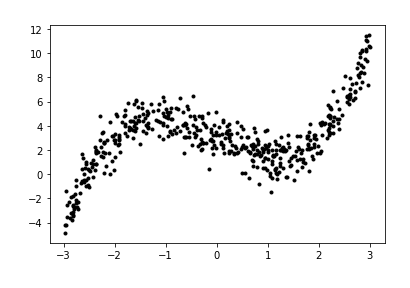

<Figure size 720x720 with 0 Axes>

In [60]:
font = {
    'family': 'serif',
    'color':'white',
    'weight':'normal',
    'size':16,
}

plt.plot(df_regdata['X data'], df_regdata['y data'] , "k." )
plt.title('Cost as a function of the number of iterations' , fontdict=font)
plt.xlabel('No. of itterations', fontdict=font)
plt.ylabel('Cost of the thetas (J)', fontdict=font)
plt.axis() # x m
plt.figure(figsize=(10, 10)) # create the size of the chart 
plt.show()

### 3rd degree Polynomial Regression will be the best method:
- 1 Feature - predicting y 

In [61]:
'''Uses train_test_split to separate the data into training and testing data '''

X= df_regdata['X data'].to_numpy().reshape(-1,1) # feature
y= df_regdata['y data'].to_numpy().reshape(-1,1) # dependant 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plot the Polynomial Fit with training data


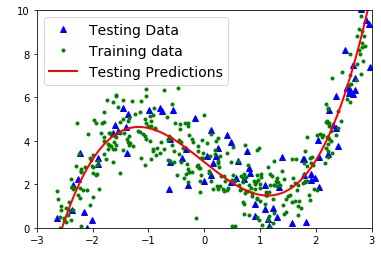

<Figure size 1440x1440 with 0 Axes>

In [62]:
# Pipeline 

# Define all the functions you want to apply
scale = StandardScaler()
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=3, include_bias=False)
'''Useful for transforming x values into polynomials'''

# Define the regression using the pipeline
polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("scale", scale),
            ("lin_reg", lin_reg),
        ])

polynomial_regression.fit(X_train, y_train)  # train the model with X and y training data 


X_new =np.linspace(-3, 3, X_test.size).reshape(-1, 1)  # makes a range of x values (-3,3) to make predictions  

y_train_prediction = polynomial_regression.predict(X_train) # y predictions using test data 
y_test_prediction = polynomial_regression.predict(X_new) # y predictions using test data 

plt.plot(X_test, y_test, "b^", label = 'Testing Data') # plot of the original data 
plt.plot(X_train, y_train, "g.", label = 'Training data') # plot of the original data 
plt.plot(X_new, y_test_prediction, "r-", linewidth=2, label="Testing Predictions") # plots x range vs predicted y for testing data

plt.xlabel("$x_1$", fontdict=font)
plt.ylabel("$y$", rotation=0, fontdict=font)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.figure(figsize=(20,20), facecolor='red',edgecolor='blue')
plt.show()


In [63]:
print(f'MSE of Training outputs vs Training predictions : {mean_squared_error(y_train,y_train_prediction)}\n')
print(f'MSE of Testing outputs vs Testing predictions: {mean_squared_error(y_test,y_test_prediction)}')


MSE of Training outputs vs Training predictions : 0.8766900505455911

MSE of Testing outputs vs Testing predictions: 15.768520546166185


## Plotting the learning curves for the model 

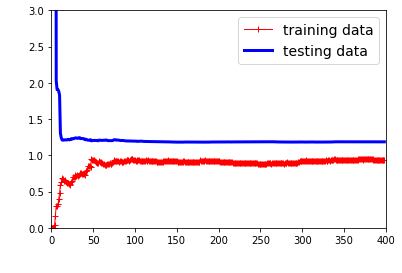

In [64]:
'''
        This function plots learning curves
        It uses train_test_split which automatically gives you a random split of your data 
        into testing and validation groups
'''


def plot_learning_curves(model,X_train, X_test, y_train, y_test):
    # X_train, X_test, y_train, y_test from earlier 
    # X_new = Range to test model with 

    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        # Fit the model to the first m elements of the training set
        model.fit(X_train[:m], y_train[:m]) # refit the model 
        # Predict from the first m elements of the training set
        y_train_predict = model.predict(X_train[:m])
        # Predict from the validation set
        y_val_predict = model.predict(X_test)
        # Calculate the training error
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        # Calculate the validation error
        val_errors.append(mean_squared_error(y_test, y_val_predict))
    
    # Plot the resulting curves
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")  # plotting the mse 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="testing data")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontdict=font) 
    plt.ylabel("RMSE", fontdict=font)              

plot_learning_curves(polynomial_regression,X_train, X_test, y_train, y_test)
plt.axis([0,len(X_train), 0, 3])          
plt.show()   

### Question 2 - Discuss your model from question 1. 

- What were your models strengths and weaknesses? 
- What choices and assumptions did you need to make along the way and why were they good choices?
- What things did you try before choosing your final "good" model?

- the model fitted the data well for the training and testing data

- Assumed the data was proportional degree 3 polynomial  

- Before choosing my final model I plotted and analyzed the data and tried plotting the other degree polyomial

### Question 3 - Import the data set below and do a full classification analysis
- Plot the data and choose a model for your decission boundary
- Separate your data into training and validation data using train_test_split
- Train your model using the training data
- Plot your model prediction on BOTH the training and validation data
- Report how your model did for BOTH the training and validataion data.


NOTE: For the last part

You could report your True Positive (TPR) and False Positive (FPR) rates using: 

from sklearn.metrics import roc_curve

to generate the TPR and FPR.

- OR - 

you can calculate your percent correct by hand:

pred_y=model.predict(X)
score=pred_y==y
score.value_counts()

#### THEN

- Reassess your model selection. You should try a few different polynomials and even linear decission boundaries before you are convinced you have a "good enough" model. This experimentation should be reflected in Question 4 where you discuss your approach and things you tried.

In [65]:
# Data for question 3
df_logdata = pd.read_csv(
    filepath_or_buffer='http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/Moons_Log_data.csv',  
    sep=',')

In [66]:
print(df_logdata.describe())
df_logdata.head()

          X1 data     X2 data
count  100.000000  100.000000
mean     0.525046    0.235040
std      0.866677    0.529963
min     -1.074793   -0.969320
25%     -0.051730   -0.150813
50%      0.486780    0.219648
75%      1.143873    0.682362
max      2.218036    1.353351


,X1 data,X2 data,y data
0,0.435680,0.936477,Dog
1,0.641974,-0.474540,Cat
2,0.165016,-0.142499,Cat
3,-0.316818,0.251311,Dog
4,-0.978219,0.722065,Dog


Feature matrix (X):
[[ 0.43568014  0.93647684]
 [ 0.64197363 -0.47454044]
 [ 0.16501615 -0.14249852]
 [-0.31681835  0.25131088]
 [-0.97821864  0.72206452]]

Dependant var (y):
0    1
1    0
2    0
3    1
4    1
Name: y data_Dog, dtype: uint8


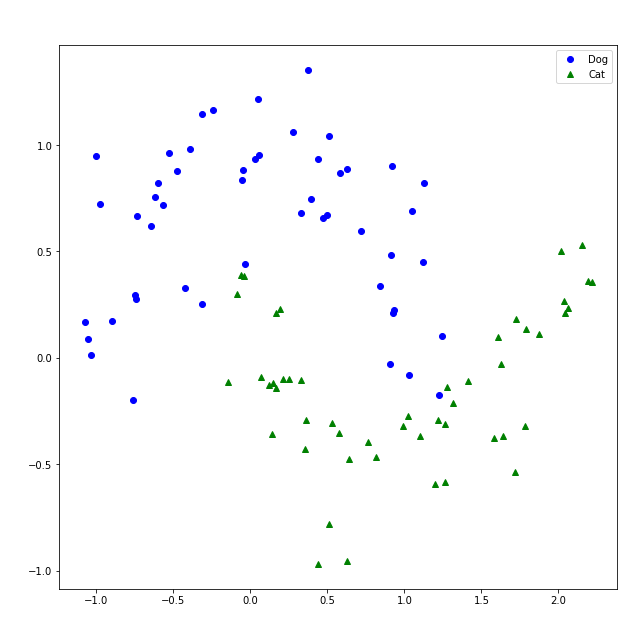

In [67]:

X=df_logdata[['X1 data','X2 data']].to_numpy()  # Feature matrix of the test scores
y=pd.get_dummies(df_logdata,prefix=['y data'])['y data_Dog']  # 1 hot encode dog = 1 cat = 0

print(f'Feature matrix (X):\n{X[:5]}\n\nDependant var (y):\n{y[:5]}')

plt.figure(figsize=(10, 10)) # create the size of the chart 
'''Plotting the X1 data vs X2 data where y data is Dog in Blue Circles '''
plt.plot(X[y==1,0],X[y==1,1], "bo", label="Dog")

'''Plotting the X1 data vs X2 data where y data is Cat in Green Triangles '''
plt.plot(X[y==0,0],X[y==0,1], "g^",label="Cat")  

## Label the graph
plt.xlabel("X1", fontdict=font)
plt.ylabel("X2", fontdict=font)


#give the plot a title
plt.title('X1 data Vs. X2 data\nfor cats and dogs', fontdict=font)

plt.legend() # shows the legend 
plt.show()



C:\Users\Raf\Anaconda3\envs\Machine Learning\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'label'


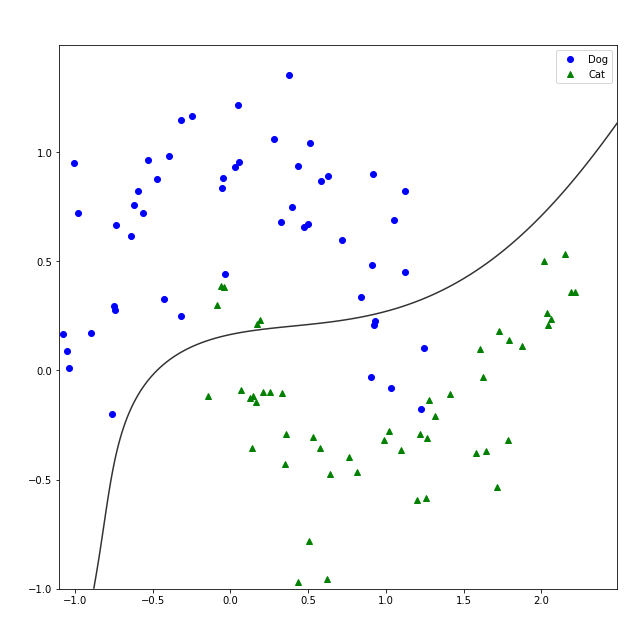

In [68]:
''' Splitting up the data and training the logistic regression model'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline 

# Define all the functions you want to apply
# scale = StandardScaler() already defined above 
log_reg = LogisticRegression(solver='lbfgs') # define the base regression type with optimization solver 
poly_features = PolynomialFeatures(degree=3, include_bias=False) # define the polynomial dependancy generator

# Define the regression using the pipeline
polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("scale", scale), # need the Standard Scalar Normalization
            ("log_reg", log_reg),
        ])

polynomial_regression.fit(X_train, y_train)  # train the model with X and y training data 


x1, x2 = np.mgrid[-1.1:2.5:.01, -1:1.5:.01] # Make a grid with which to give x vals for the prediction curve
grid = np.c_[x1.ravel(), x2.ravel()]
probs = polynomial_regression.predict_proba(grid)[:, 1].reshape(x1.shape)



plt.figure(figsize=(10, 10)) # create the size of the chart 
'''Plotting the X1 data vs X2 data where y data is Dog in Blue Circles '''
plt.plot(X[y==1,0],X[y==1,1], "bo", label="Dog")

'''Plotting the X1 data vs X2 data where y data is Cat in Green Triangles '''
plt.plot(X[y==0,0],X[y==0,1], "g^",label="Cat")  


''' levels '''
plt.contour(x1, x2, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6, label="decision boundary")


## Label the graph
plt.xlabel("X1", fontdict=font)
plt.ylabel("X2", fontdict=font)


#give the plot a title
plt.title('X1 data Vs. X2 data\nfor cats and dogs', fontdict=font)

plt.legend() # shows the legend 
plt.show()

 ## reporting how the model did using TPT and FPR

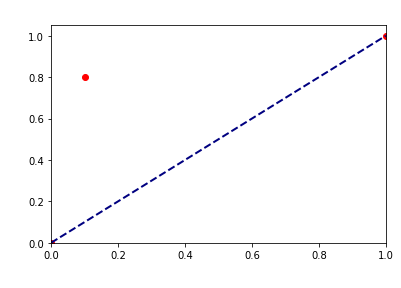

0.1 0.8


In [73]:
# Compute ROC curve and ROC area for each class
y_score = polynomial_regression.fit(X_train, y_train).predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)    
# Plot the resulting curves
plt.figure()
lw = 2
plt.plot(fpr, tpr, 'ro', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontdict=font)
plt.ylabel('True Positive Rate',fontdict=font)
plt.title('Receiver operating characteristic example', fontdict=font)
plt.show()
print(fpr[1],tpr[1])

### Question 4 - Discuss your model from question 3. 

- What were your models strengths and weaknesses? 
- What choices and assumptions did you need to make along the way and why were they good choices?
- What things did you try before chosing your final "good" model?

* The model fits the data well and doesnt have many weaknesses 
* I had to make the assumption that the data could be separable with a curve 
* I had to plot the data as well as analyze the data as well as try polynomials of degrees 1 through 5 before 
deciding that degree 3 was the best fit.


### Do you have an overall questions or ideas from linear, logistic, or polynomial regression that you would like us to revisit in class?